In [53]:
import numpy as np                   
import matplotlib.pyplot as plt      
import random                        
from keras.datasets import mnist    

(x_train, y_train), (x_test, y_test) = mnist.load_data()

print("train input shape", x_train.shape)
print("train label shape", y_train.shape)
print("test input shape", x_test.shape)
print("test label shape", y_test.shape)

train input shape (60000, 28, 28)
train label shape (60000,)
test input shape (10000, 28, 28)
test label shape (10000,)


In [54]:
# data augmentation
x_train_aug = np.subtract(255, x_train)
x_test_aug = np.subtract(255, x_test)

new_x_train = np.concatenate((x_train, x_train_aug), axis=0)
new_y_train = np.concatenate((y_train, y_train), axis=0)
new_x_test = np.concatenate((x_test, x_test_aug), axis=0)
new_y_test = np.concatenate((y_test, y_test), axis=0)

In [55]:
from sklearn.utils import shuffle
new_x_train, new_y_train = shuffle(new_x_train, new_y_train, random_state=10)
new_x_test, new_y_test = shuffle(new_x_test, new_y_test, random_state=8)

train input shape after augmentation (120000, 28, 28)
test input shape after augmentation (20000, 28, 28)


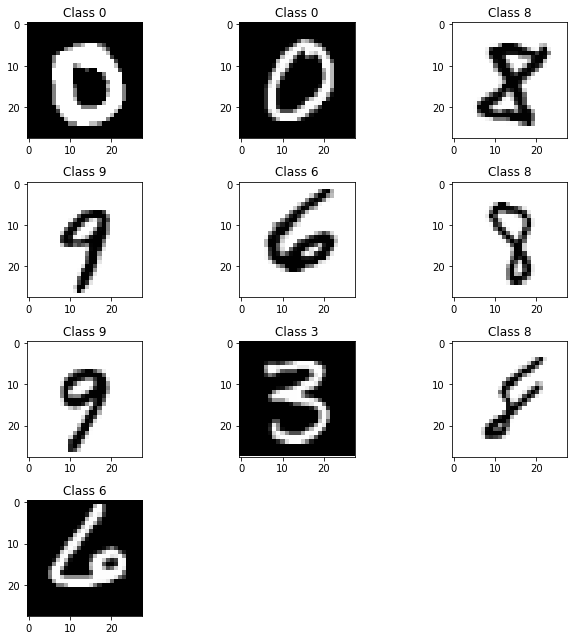

In [56]:
print("train input shape after augmentation", new_x_train.shape)
print("test input shape after augmentation", new_x_test.shape)

plt.rcParams['figure.figsize'] = (9,9) # Make the figures a bit bigger

for i in range(10):
  plt.subplot(4,3,i+1)
  plt.imshow(new_x_train[i], cmap='gray', interpolation='none')
  plt.title("Class {}".format(new_y_train[i]))

plt.tight_layout()

In [5]:
shape1 = new_x_train.shape
shape2 = new_x_test.shape
new_x_train = np.reshape(new_x_train, (shape1[0], shape1[1], shape1[2], 1))
new_x_test = np.reshape(new_x_test, (shape2[0], shape2[1], shape2[2], 1))

print("train input shape after reshape", new_x_train.shape)
print("test input shape after reshape", new_x_test.shape)

train input shape after reshape (120000, 28, 28, 1)
test input shape after reshape (20000, 28, 28, 1)


In [6]:
# normalized = (x - min) / (max - min)
# in this example = x / 255
import tensorflow as tf

new_x_train = new_x_train / 255
new_x_test = new_x_test / 255

new_y_train = tf.keras.utils.to_categorical(new_y_train, num_classes=10)
new_y_test = tf.keras.utils.to_categorical(new_y_test, num_classes=10)

In [36]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, LeakyReLU, Flatten, PReLU

def sequential_network(alpha):
  leaky_relu = LeakyReLU(alpha=alpha)
  model = Sequential()
  model.add(Conv2D(8, 7, activation=leaky_relu))
  model.add(Conv2D(8, 5, activation=leaky_relu))
  model.add(Flatten())
  model.add(Dense(10, activation='softmax'))

  return model

test_model = sequential_network(0.3)
test_model.build(new_x_train.shape)
print(test_model.summary())

Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_52 (Conv2D)           (120000, 22, 22, 8)       400       
_________________________________________________________________
conv2d_53 (Conv2D)           (120000, 18, 18, 8)       1608      
_________________________________________________________________
flatten_26 (Flatten)         (120000, 2592)            0         
_________________________________________________________________
dense_26 (Dense)             (120000, 10)              25930     
Total params: 27,938
Trainable params: 27,938
Non-trainable params: 0
_________________________________________________________________
None


In [34]:
epoch_size = 5
batch_size = 128


def train(model):
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  history = model.fit(new_x_train, new_y_train, epochs=epoch_size, batch_size=batch_size)
  return history

def test(model):
  loss, acc = model.evaluate(new_x_test, new_y_test, verbose = 0) 
  return (loss, acc)

def plot(history):
  figure, (ax1, ax2) = plt.subplots(1, 2)
  
  ax1.plot(history.history['accuracy'])
  ax1.set_title('model accuracy')
  
  ax2.plot(history.history['loss'])
  ax2.set_title('model loss')
  figure.tight_layout()
  plt.show()

model with alpha = -1
Epoch 1/5
938/938 [==============================] - 7s 7ms/step - loss: 0.2291 - accuracy: 0.9316
Epoch 2/5
938/938 [==============================] - 7s 7ms/step - loss: 0.0755 - accuracy: 0.9769
Epoch 3/5
938/938 [==============================] - 7s 7ms/step - loss: 0.0609 - accuracy: 0.9814
Epoch 4/5
938/938 [==============================] - 7s 7ms/step - loss: 0.0543 - accuracy: 0.9831
Epoch 5/5
938/938 [==============================] - 7s 7ms/step - loss: 0.0480 - accuracy: 0.9847


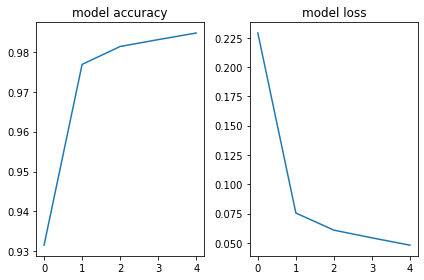

Accuracy on test data: 97.96
Loss on test data: 0.07
*****************************************************
model with alpha = -0.5
Epoch 1/5
938/938 [==============================] - 7s 7ms/step - loss: 0.2384 - accuracy: 0.9291
Epoch 2/5
938/938 [==============================] - 7s 7ms/step - loss: 0.0795 - accuracy: 0.9758
Epoch 3/5
938/938 [==============================] - 7s 7ms/step - loss: 0.0632 - accuracy: 0.9805
Epoch 4/5
938/938 [==============================] - 7s 7ms/step - loss: 0.0538 - accuracy: 0.9835
Epoch 5/5
938/938 [==============================] - 7s 7ms/step - loss: 0.0475 - accuracy: 0.9850


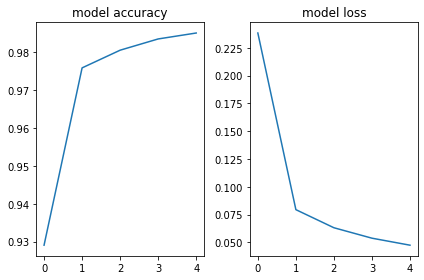

Accuracy on test data: 97.94
Loss on test data: 0.06
*****************************************************
model with alpha = 0
Epoch 1/5
938/938 [==============================] - 7s 7ms/step - loss: 0.2377 - accuracy: 0.9281
Epoch 2/5
938/938 [==============================] - 7s 7ms/step - loss: 0.0843 - accuracy: 0.9742
Epoch 3/5
938/938 [==============================] - 7s 7ms/step - loss: 0.0673 - accuracy: 0.9794
Epoch 4/5
938/938 [==============================] - 7s 7ms/step - loss: 0.0579 - accuracy: 0.9823
Epoch 5/5
938/938 [==============================] - 7s 7ms/step - loss: 0.0520 - accuracy: 0.9838


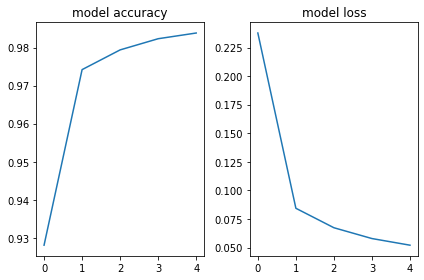

Accuracy on test data: 98.22
Loss on test data: 0.06
*****************************************************
model with alpha = 0.5
Epoch 1/5
938/938 [==============================] - 8s 7ms/step - loss: 0.3658 - accuracy: 0.8875
Epoch 2/5
938/938 [==============================] - 7s 7ms/step - loss: 0.1212 - accuracy: 0.9633
Epoch 3/5
938/938 [==============================] - 7s 8ms/step - loss: 0.1005 - accuracy: 0.9699
Epoch 4/5
938/938 [==============================] - 7s 8ms/step - loss: 0.0899 - accuracy: 0.9728
Epoch 5/5
938/938 [==============================] - 7s 7ms/step - loss: 0.0821 - accuracy: 0.9756


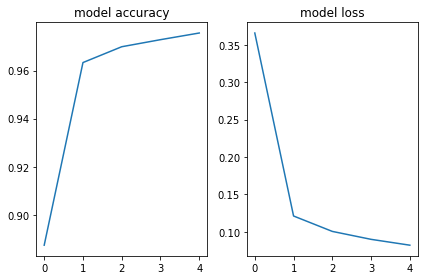

Accuracy on test data: 97.29
Loss on test data: 0.08
*****************************************************
model with alpha = 1
Epoch 1/5
938/938 [==============================] - 7s 7ms/step - loss: 2.3104 - accuracy: 0.1479
Epoch 2/5
938/938 [==============================] - 7s 7ms/step - loss: 2.3045 - accuracy: 0.1324
Epoch 3/5
938/938 [==============================] - 7s 7ms/step - loss: 2.3038 - accuracy: 0.1194
Epoch 4/5
938/938 [==============================] - 7s 7ms/step - loss: 2.3039 - accuracy: 0.1129
Epoch 5/5
938/938 [==============================] - 7s 7ms/step - loss: 2.3038 - accuracy: 0.1179


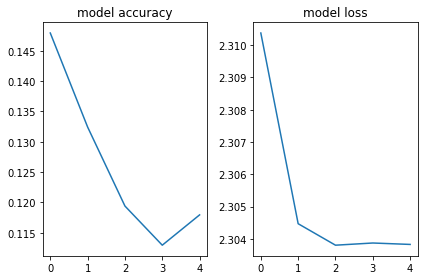

Accuracy on test data: 11.69
Loss on test data: 2.30
*****************************************************


In [35]:
alphas = [-1, -0.5, 0, 0.5, 1]
for a in alphas:
  print("model with alpha =", a)
  model = sequential_network(a)
  hist = train(model)
  test_loss, test_acc = test(model)
  plot(hist)
  print('Accuracy on test data: %.2f' % (test_acc*100))
  print('Loss on test data: %.2f' % (test_loss))
  print("*****************************************************")

In [39]:
def sequential_network_Prelu():
  prelu = PReLU(shared_axes=[1,2])
  model = Sequential()
  model.add(Conv2D(8, 7, activation=prelu))
  model.add(Conv2D(8, 5, activation=prelu))
  model.add(Flatten())
  model.add(Dense(10, activation='softmax'))

  return model

PReLU model
Epoch 1/5
938/938 [==============================] - 8s 8ms/step - loss: 0.2403 - accuracy: 0.9259
Epoch 2/5
938/938 [==============================] - 7s 8ms/step - loss: 0.0813 - accuracy: 0.9751
Epoch 3/5
938/938 [==============================] - 7s 8ms/step - loss: 0.0637 - accuracy: 0.9806
Epoch 4/5
938/938 [==============================] - 7s 8ms/step - loss: 0.0562 - accuracy: 0.9827
Epoch 5/5
938/938 [==============================] - 7s 8ms/step - loss: 0.0493 - accuracy: 0.9842


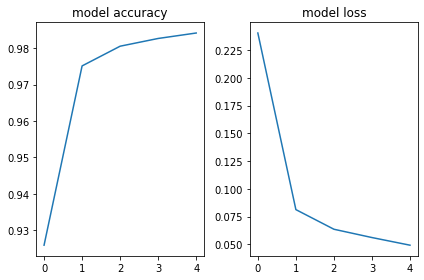

Accuracy on test data: 98.39
Loss on test data: 0.05


In [50]:
print("PReLU model")
model_prelu = sequential_network_Prelu()
hist = train(model_prelu)
test_loss, test_acc = test(model_prelu)
plot(hist)
print('Accuracy on test data: %.2f' % (test_acc*100))
print('Loss on test data: %.2f' % (test_loss))

In [51]:
layers = model_prelu.layers

W1 = layers[0].get_weights()
print(W1[2])

W2 = layers[1].get_weights()
print(W2[2])

[[[-0.09735187 -0.2429723  -0.36114842 -0.15082116 -0.23535672
   -0.02661474 -0.2351685   0.391844  ]]]
[[[-0.09735187 -0.2429723  -0.36114842 -0.15082116 -0.23535672
   -0.02661474 -0.2351685   0.391844  ]]]
